# POPPY Examples 

**This is a notebook version of the examples available in the POPPY documentation at http://pythonhosted.org/poppy/examples.html**

**It differs only cosmetically from the code there: it contains some extra function calls to set an aesthetically pleasing size for each plot, and to save the outputs to PNGs for inclusion in the documentation source code. These lines are left out of the example docs HTML page just to streamline it a bit.**

In [1]:
%pylab inline
import poppy
poppy.__version__

Populating the interactive namespace from numpy and matplotlib


'0.5.0'

Let’s dive right in to some example code.

For all of the following examples, you will have more informative text output when running the code if you first enable Python’s logging mechanism to display log messages to screen:

In [2]:
import logging
logging.basicConfig(level=logging.DEBUG)

## A simple circular pupil

This is very simple, as it should be:

INFO:poppy:Initialized OpticalSystem: unnamed system
INFO:poppy:Added pupil plane: Circle, radius=3.0 m
INFO:poppy:Added detector with pixelscale=0.01 and oversampling=2: Detector
INFO:poppy:Calculating PSF with 1 wavelengths
INFO:poppy: Propagating wavelength = 2e-06 m
DEBUG:poppy:Creating input wavefront with wavelength=2e-06 m, npix=1024, pixel scale=0.00586 meters/pixel
DEBUG:poppy:  Wavefront and optic Circle, radius=3.0 m already at same plane type, no propagation needed.
DEBUG:poppy:  Multiplied WF by phasor for Pupil plane: Circle, radius=3.0 m (Analytic)
DEBUG:poppy:normalizing at first plane (entrance pupil) to 1.0 total intensity
DEBUG:poppy:  Propagating wavefront to Detector plane: Detector (500x500 pixels, 0.01 arcsec / pix). 
DEBUG:poppy:conf.use_fftw is True
DEBUG:poppy:MatrixFourierTransform initialized using centering type = ADJUSTABLE
DEBUG:poppy:    Propagating w/ MFT: 0.0050 arcsec / pix     fov=72.722 lam/D    npix=1000
DEBUG:poppy:      MFT method = ADJUSTABLE
DE

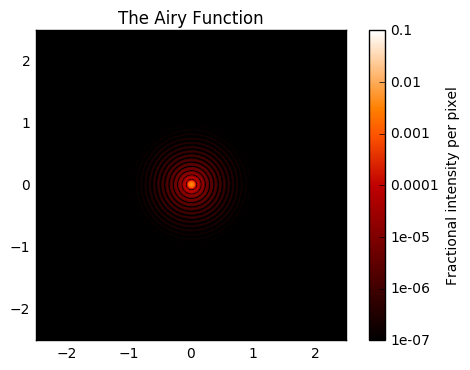

In [3]:
osys = poppy.OpticalSystem()
osys.add_pupil(poppy.CircularAperture(radius=3))    # pupil radius in meters
osys.add_detector(pixelscale=0.010, fov_arcsec=5.0)  # image plane coordinates in arcseconds

psf = osys.calc_psf(2e-6)                            # wavelength in microns
poppy.display_psf(psf, title='The Airy Function') 

plt.savefig('example_airy.png', dpi=100)

## A complex segmented pupil


By combining multiple analytic optics together it is possible to create quite complex pupils:

DEBUG:poppy:Displaying Mock ATLAST
INFO:poppy:Computing amplitude for Mock ATLAST sampled onto 1024 pixel grid
INFO:poppy:Computing opd for Mock ATLAST sampled onto 1024 pixel grid
DEBUG:poppy:Display pixel scale = 0.013740234374999999 m / pix 


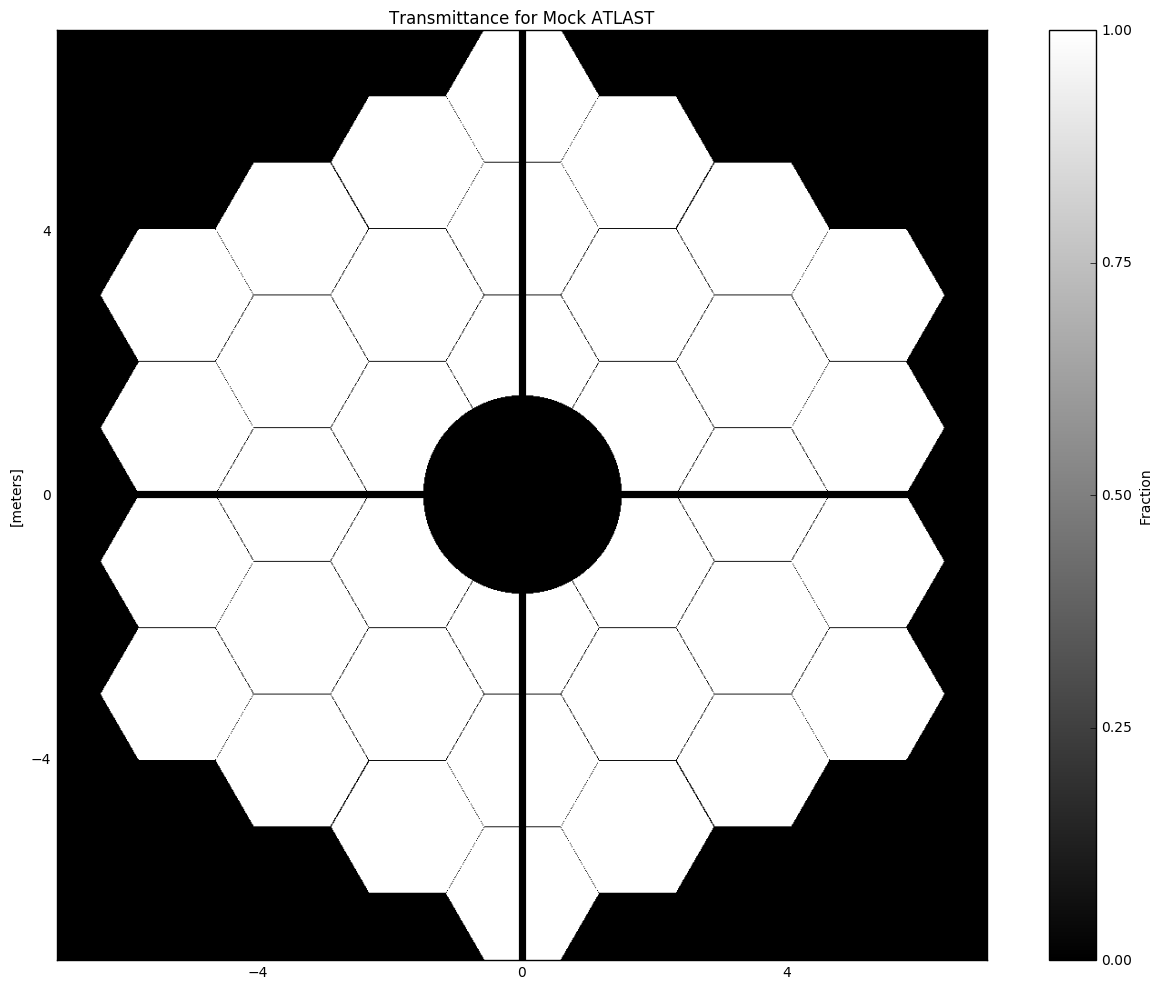

In [4]:
plt.figure(figsize=(16,12))

ap = poppy.MultiHexagonAperture(rings=3, flattoflat=2)           # 3 rings of 2 m segments yields 14.1 m circumscribed diameter
sec = poppy.SecondaryObscuration(secondary_radius=1.5, n_supports=4, support_width=0.1)   # secondary with spiders
atlast = poppy.CompoundAnalyticOptic( opticslist=[ap, sec], name='Mock ATLAST')           # combine into one optic

atlast.display(npix=1024, colorbar_orientation='vertical')
plt.savefig('example_atlast_pupil.png', dpi=100)

And here’s the PSF:

INFO:poppy:Initialized OpticalSystem: unnamed system
INFO:poppy:Added pupil plane: Mock ATLAST
INFO:poppy:Added detector with pixelscale=0.01 and oversampling=2: Detector
INFO:poppy:Calculating PSF with 1 wavelengths
INFO:poppy: Propagating wavelength = 1e-06 m
DEBUG:poppy:Creating input wavefront with wavelength=1e-06 m, npix=1024, pixel scale=0.0137 meters/pixel
DEBUG:poppy:  Wavefront and optic Mock ATLAST already at same plane type, no propagation needed.
DEBUG:poppy:  Multiplied WF by phasor for Pupil plane: Mock ATLAST (Analytic)
DEBUG:poppy:normalizing at first plane (entrance pupil) to 1.0 total intensity
DEBUG:poppy:  Propagating wavefront to Detector plane: Detector (200x200 pixels, 0.01 arcsec / pix). 
DEBUG:poppy:conf.use_fftw is True
DEBUG:poppy:MatrixFourierTransform initialized using centering type = ADJUSTABLE
DEBUG:poppy:    Propagating w/ MFT: 0.0050 arcsec / pix     fov=136.427 lam/D    npix=400
DEBUG:poppy:      MFT method = ADJUSTABLE
DEBUG:poppy:Forward MatrixFour

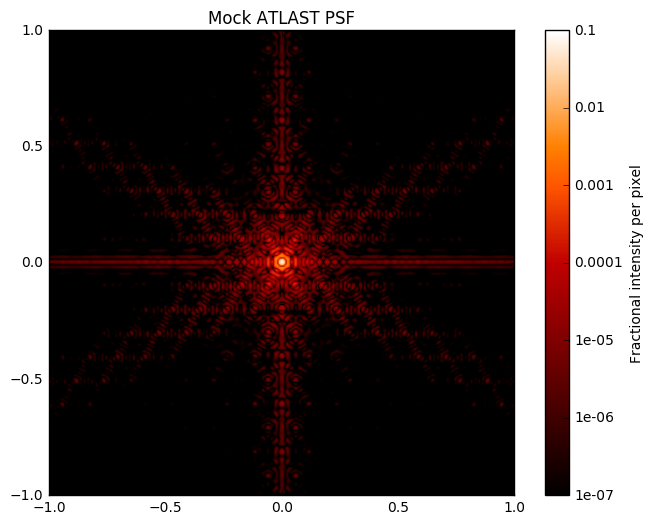

In [5]:
plt.figure(figsize=(8,6))

osys = poppy.OpticalSystem()
osys.add_pupil(atlast)
osys.add_detector(pixelscale=0.010, fov_arcsec=2.0)
psf = osys.calc_psf(1e-6)

poppy.display_psf(psf, title="Mock ATLAST PSF")
plt.savefig('example_atlast_psf.png', dpi=100)

## Multiple defocused PSFs

Defocus can be added using a lens:

INFO:poppy:Initialized OpticalSystem: test
INFO:poppy:Added pupil plane: Circle, radius=3.0 m
INFO:poppy:Added pupil plane: Thin lens
INFO:poppy:Added detector with pixelscale=0.01 and oversampling=2: Detector
INFO:poppy:Calculating PSF with 1 wavelengths
INFO:poppy: Propagating wavelength = 1e-06 m
DEBUG:poppy:Creating input wavefront with wavelength=1e-06 m, npix=1024, pixel scale=0.00586 meters/pixel
DEBUG:poppy:  Wavefront and optic Circle, radius=3.0 m already at same plane type, no propagation needed.
DEBUG:poppy:  Multiplied WF by phasor for Pupil plane: Circle, radius=3.0 m (Analytic)
DEBUG:poppy:normalizing at first plane (entrance pupil) to 1.0 total intensity
DEBUG:poppy:  Wavefront and optic Thin lens already at same plane type, no propagation needed.
DEBUG:poppy:  Multiplied WF by phasor for Pupil plane: Thin lens (Analytic)
DEBUG:poppy:  Propagating wavefront to Detector plane: Detector (400x400 pixels, 0.01 arcsec / pix). 
DEBUG:poppy:conf.use_fftw is True
DEBUG:poppy:Ma

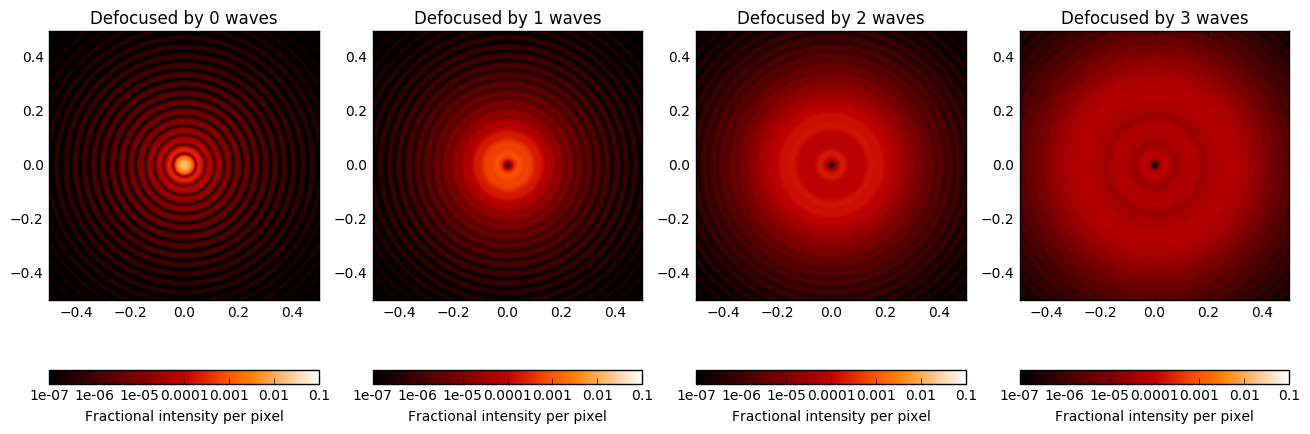

In [6]:
plt.figure(figsize=(16,6))

wavelen=1e-6
nsteps = 4
psfs = []
for nwaves in range(nsteps):

    osys = poppy.OpticalSystem("test", oversample=2)
    osys.add_pupil( poppy.CircularAperture(radius=3))    # pupil radius in meters
    osys.add_pupil( poppy.ThinLens(nwaves=nwaves, reference_wavelength=wavelen, radius=3))
    osys.add_detector(pixelscale=0.01, fov_arcsec=4.0)

    psf = osys.calc_psf(wavelength=wavelen)
    psfs.append(psf)

    plt.subplot(1,nsteps, nwaves+1)
    poppy.display_psf(psf, title='Defocused by {0} waves'.format(nwaves),
        colorbar_orientation='horizontal', imagecrop=1.0)
plt.savefig('example_defocus.png', dpi=100)

## Band Limited Coronagraph with Off-Axis Source
As an example of a more complicated calculation, here’s a NIRCam-style band limited coronagraph with the source not precisely centered:

INFO:poppy:Initialized OpticalSystem: test
INFO:poppy:Added pupil plane: Circle, radius=3.25 m
INFO:poppy:Added image plane: -empty-
INFO:poppy:Added image plane: unnamed BLC
INFO:poppy:Added pupil plane: -empty-
INFO:poppy:Added pupil plane: Circle, radius=3.25 m
INFO:poppy:Added detector with pixelscale=0.01 and oversampling=2: Detector
INFO:poppy:Calculating PSF with 1 wavelengths
INFO:poppy: Propagating wavelength = 4.6e-06 m
DEBUG:poppy:Creating input wavefront with wavelength=4.6e-06 m, npix=1024, pixel scale=0.00635 meters/pixel
DEBUG:poppy:Tilted input wavefront by theta_X=-0.070711, theta_Y=0.070711 arcsec. (signs=1, 1; theta offset=0.000000) 
DEBUG:poppy:  Wavefront and optic Circle, radius=3.25 m already at same plane type, no propagation needed.
DEBUG:poppy:  Multiplied WF by phasor for Pupil plane: Circle, radius=3.25 m (Analytic)
DEBUG:poppy:normalizing at first plane (entrance pupil) to 1.0 total intensity
DEBUG:poppy:  Propagating wavefront to Image plane: -empty- (Anal

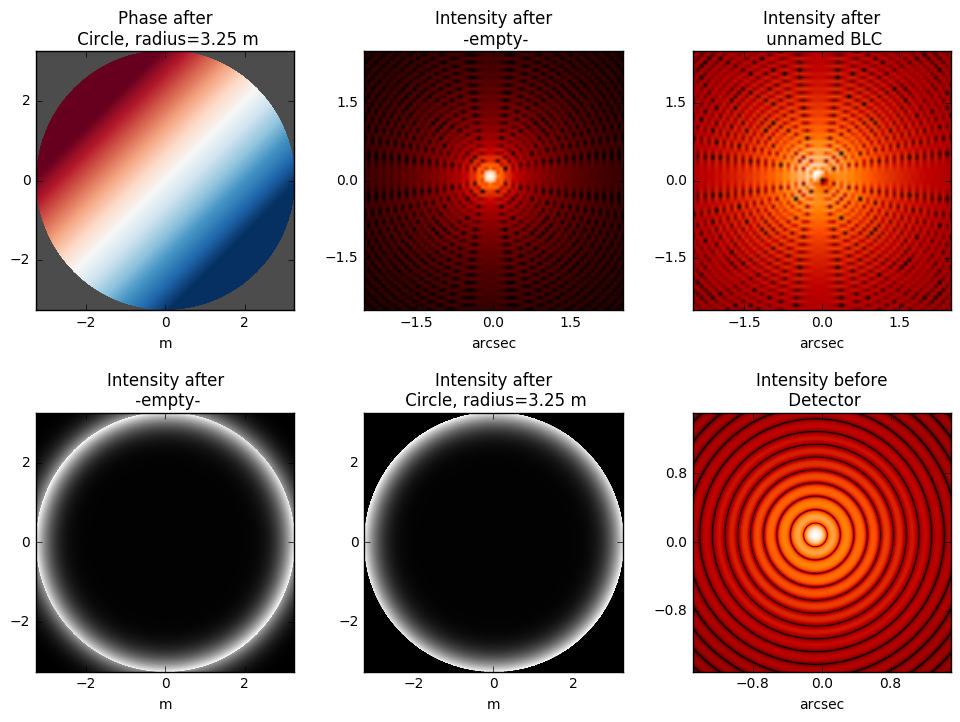

In [7]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(hspace=0.4)

oversample=2
pixelscale = 0.010  #arcsec/pixel
wavelength = 4.6e-6

osys = poppy.OpticalSystem("test", oversample=oversample)
osys.addPupil(poppy.CircularAperture(radius=6.5/2))
osys.addImage()
osys.addImage(poppy.BandLimitedCoron(kind='circular',  sigma=5.0))
osys.addPupil()
lyot = poppy.CircularAperture(radius=6.5/2)
lyot.wavefront_display_hint='intensity'  # optional - just affects the display
osys.addPupil(lyot)
osys.addDetector(pixelscale=pixelscale, fov_arcsec=3.0)

osys.source_offset_theta = 45.
osys.source_offset_r =  0.1  # arcsec
psf = osys.calcPSF(wavelength=wavelength, display_intermediates=True)
plt.savefig('example_BLC_offset.png', dpi=100)

## FQPM coronagraph
Four quadrant phase mask coronagraphs are a bit more complicated because one needs to ensure proper alignment of the FFT result with the center of the phase mask. This is done using a virtual optic called an ‘FQPM FFT aligner’ as follows:

INFO:poppy:Initialized OpticalSystem: unnamed system
INFO:poppy:Added pupil plane: Circle, radius=3.0 m
INFO:poppy:Added pupil plane: FQPM FFT aligner
INFO:poppy:Added image plane: -empty-
INFO:poppy:Added image plane: unnamed FQPM 
INFO:poppy:Added pupil plane: FQPM FFT aligner
INFO:poppy:Added pupil plane: Circle, radius=3.0 m
INFO:poppy:Added detector with pixelscale=0.01 and oversampling=2: Detector
INFO:poppy:Calculating PSF with 1 wavelengths
INFO:poppy: Propagating wavelength = 2e-06 m
DEBUG:poppy:Creating input wavefront with wavelength=2e-06 m, npix=1024, pixel scale=0.00879 meters/pixel
DEBUG:poppy:  Wavefront and optic Circle, radius=3.0 m already at same plane type, no propagation needed.
DEBUG:poppy:  Multiplied WF by phasor for Pupil plane: Circle, radius=3.0 m (Analytic)
DEBUG:poppy:normalizing at first plane (entrance pupil) to 1.0 total intensity
DEBUG:poppy:  Wavefront and optic FQPM FFT aligner already at same plane type, no propagation needed.
DEBUG:poppy:  Multipli

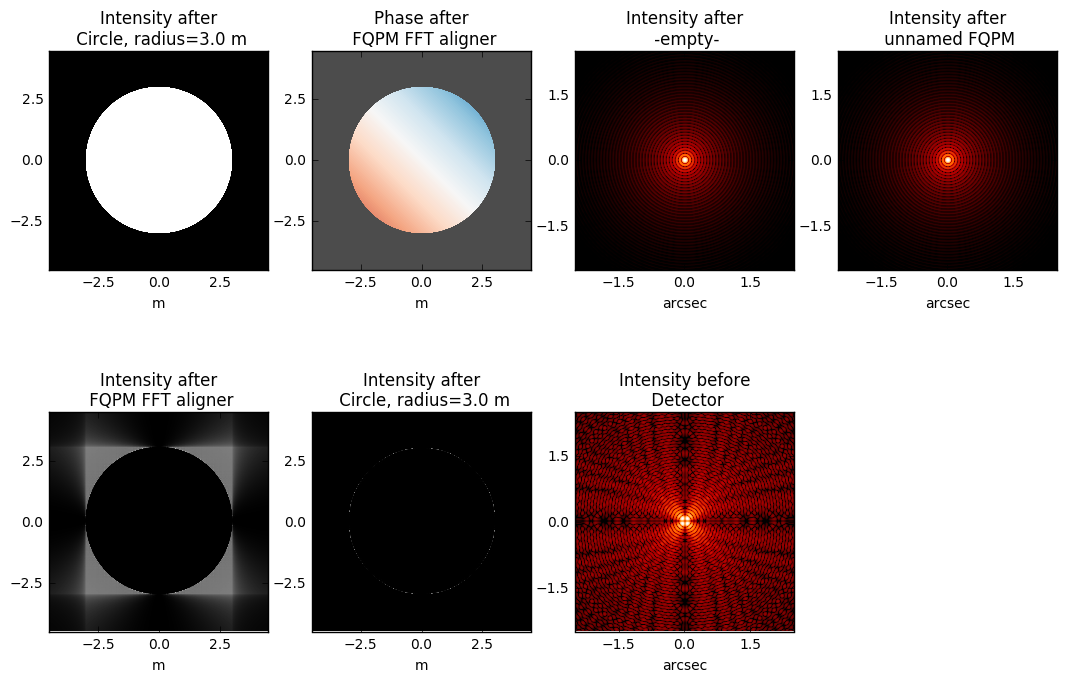

In [8]:
plt.figure(figsize=(13,8))
plt.subplots_adjust(hspace=0.4, wspace=0.2)

optsys = poppy.OpticalSystem()
optsys.add_pupil( poppy.CircularAperture( radius=3, pad_factor=1.5)) #pad display area by 50%
optsys.add_pupil( poppy.FQPM_FFT_aligner())   # ensure the PSF is centered on the FQPM cross hairs
optsys.add_image()  # empty image plane for "before the mask"
optsys.add_image( poppy.IdealFQPM(wavelength=2e-6))
optsys.add_pupil( poppy.FQPM_FFT_aligner(direction='backward'))  # undo the alignment tilt after going back to the pupil plane
optsys.add_pupil( poppy.CircularAperture( radius=3)) # Lyot mask - change radius if desired
optsys.add_detector(pixelscale=0.01, fov_arcsec=10.0)

for plane in optsys.planes[4:6]:
    plane.wavefront_display_hint = 'intensity' # display this rather than the default phase

psf = optsys.calcPSF(wavelength=2e-6, display_intermediates=True)

plt.savefig('example_FQPM.png', dpi=100)

## FQPM on an Obscured Aperture (demonstrates compound optics)
As a variation, we can add a secondary obscuration. This can be done by creating a compound optic consisting of the circular outer aperture plus an opaque circular obscuration. The latter we can make using the InverseTransmission class.

INFO:poppy:Initialized OpticalSystem: unnamed system
INFO:poppy:Added pupil plane: unnamed
INFO:poppy:Added pupil plane: FQPM FFT aligner
INFO:poppy:Added image plane: unnamed FQPM 
INFO:poppy:Added pupil plane: FQPM FFT aligner
INFO:poppy:Added pupil plane: Circle, radius=3.0 m
INFO:poppy:Added detector with pixelscale=0.01 and oversampling=2: Detector
INFO:poppy:Displaying plane unnamed in row 1 of 3
DEBUG:poppy:Displaying unnamed
INFO:poppy:Computing amplitude for unnamed sampled onto 512 pixel grid
INFO:poppy:Computing opd for unnamed sampled onto 512 pixel grid
DEBUG:poppy:Display pixel scale = 0.017578125 m / pix 
INFO:poppy:Displaying plane unnamed FQPM  in row 2 of 3
DEBUG:poppy:Displaying unnamed FQPM 
INFO:poppy:Computing amplitude for unnamed FQPM  sampled onto 512 pixel grid
INFO:poppy:Computing opd for unnamed FQPM  sampled onto 512 pixel grid
DEBUG:poppy:Display pixel scale = 0.0078125 arcsec / pix 
INFO:poppy:Displaying plane Circle, radius=3.0 m in row 3 of 3
DEBUG:popp

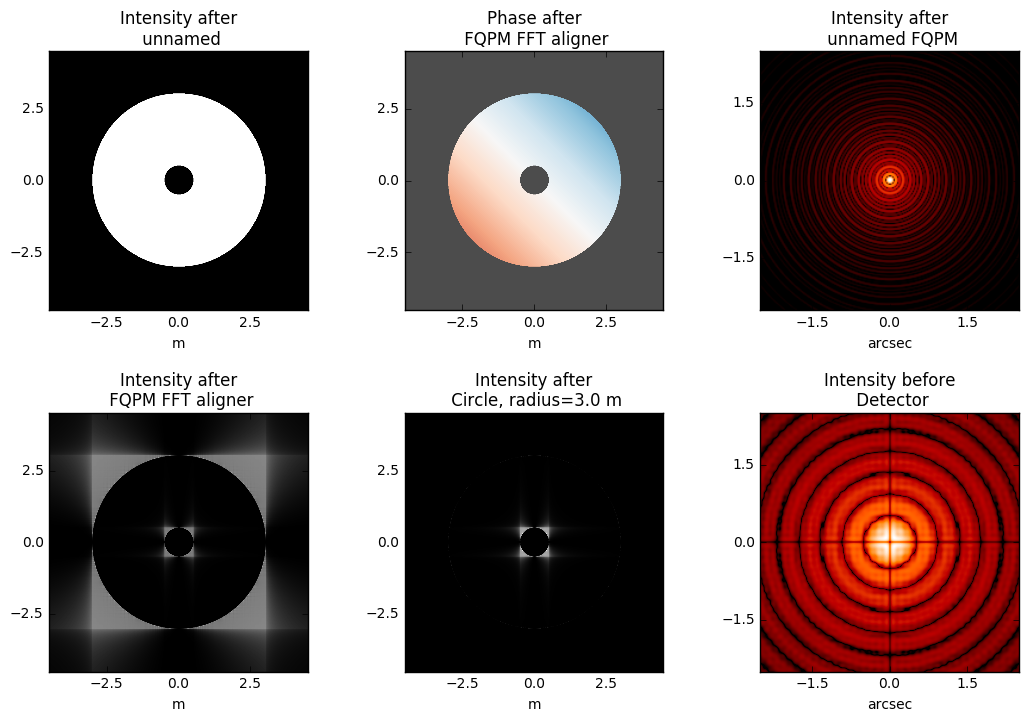

In [9]:
plt.figure(figsize=(13,8))
plt.subplots_adjust(hspace=0.4, wspace=0.2)

primary = poppy.CircularAperture( radius=3, pad_factor=1.5)
secondary = poppy.InverseTransmission( poppy.CircularAperture(radius=0.5) )
aperture = poppy.CompoundAnalyticOptic( opticslist = [primary, secondary] )

optsys = poppy.OpticalSystem()
optsys.add_pupil( aperture)
optsys.add_pupil( poppy.FQPM_FFT_aligner())   # ensure the PSF is centered on the FQPM cross hairs
optsys.add_image( poppy.IdealFQPM(wavelength=2e-6))
optsys.add_pupil( poppy.FQPM_FFT_aligner(direction='backward'))  # undo the alignment tilt after going back to the pupil plane
optsys.add_pupil( poppy.CircularAperture( radius=3)) # Lyot mask - change radius if desired
optsys.add_detector(pixelscale=0.01, fov_arcsec=10.0)

for plane in optsys.planes[3:5]:
    plane.wavefront_display_hint = 'intensity' # display this rather than the default phase

optsys.display()

psf = optsys.calc_psf(wavelength=2e-6, display_intermediates=True)
plt.savefig('example_FQPM_obscured.png', dpi=100)

## Semi-analytic Coronagraph Calculations
In some cases, coronagraphy calculations can be sped up significantly using the semi-analytic algorithm of Soummer et al. This is implemented by first creating an OpticalSystem as usual, and then casting it to a SemiAnalyticCoronagraph class (which has a special customized propagation method implementing the alternate algorithm):

The following code performs the same calculation both ways and compares their speeds:

INFO:poppy:Initialized OpticalSystem: test
INFO:poppy:Added pupil plane: Circle, radius=3.25 m
INFO:poppy:Added image plane: unnamed occulter
INFO:poppy:Added pupil plane: Circle, radius=2.6 m
INFO:poppy:Added detector with pixelscale=0.06 and oversampling=8: Detector
INFO:poppy:Calculating PSF with 1 wavelengths
INFO:poppy: Propagating wavelength = 1e-06 m meters using Fast Semi-Analytic Coronagraph method
DEBUG:poppy:Creating input wavefront with wavelength=1e-06 m, npix=1024, pixel scale=0.00635 meters/pixel
DEBUG:poppy:  Multiplied WF by phasor for Pupil plane: Circle, radius=3.25 m (Analytic)
DEBUG:poppy:  Propagating wavefront to Detector plane: Oversampled Occulter Plane (40x40 pixels, 0.0075 arcsec / pix). 
DEBUG:poppy:conf.use_fftw is True
DEBUG:poppy:MatrixFourierTransform initialized using centering type = ADJUSTABLE
DEBUG:poppy:    Propagating w/ MFT: 0.0075 arcsec / pix     fov=9.454 lam/D    npix=40
DEBUG:poppy:      MFT method = ADJUSTABLE
DEBUG:poppy:Forward MatrixFouri

Elapsed time, FFT:  86.390 s
Elapsed time, SAM:  2.146 s


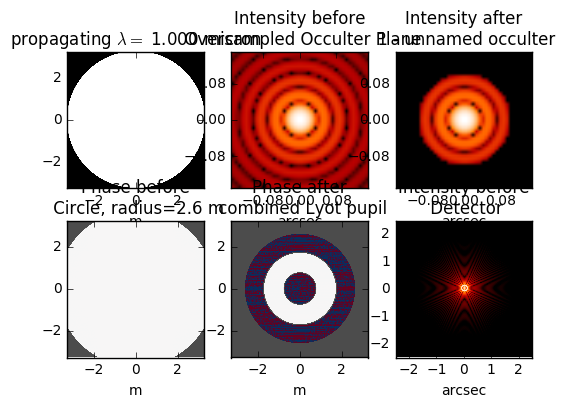

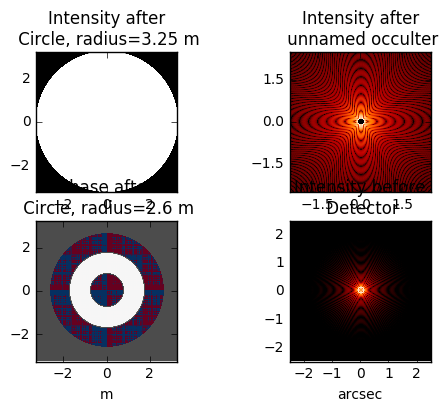

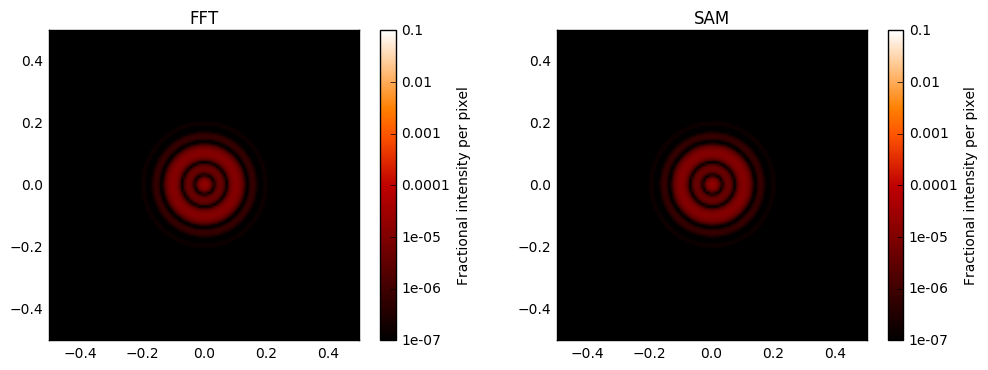

In [10]:
radius = 6.5/2
lyot_radius = 6.5/2.5
pixelscale = 0.060

osys = poppy.OpticalSystem("test", oversample=8)
osys.addPupil( poppy.CircularAperture(radius=radius), name='Entrance Pupil')
osys.addImage( poppy.CircularOcculter(radius = 0.1) )
osys.addPupil( poppy.CircularAperture(radius=lyot_radius), name='Lyot Pupil')
osys.addDetector(pixelscale=pixelscale, fov_arcsec=5.0)


plt.figure(1)
sam_osys = poppy.SemiAnalyticCoronagraph(osys, oversample=8, occulter_box=0.15)

import time
t0s = time.time()
psf_sam = sam_osys.calcPSF(display_intermediates=True)
t1s = time.time()

plt.figure(2)
t0f = time.time()
psf_fft = osys.calcPSF(display_intermediates=True)
t1f = time.time()

plt.figure(3, figsize=(12,4))
plt.clf()
plt.subplot(121)
poppy.utils.display_PSF(psf_fft, title="FFT", imagecrop=1)
plt.subplot(122)
poppy.utils.display_PSF(psf_sam, title="SAM", imagecrop=1)
plt.savefig('example_SAM_comparison.png', dpi=100)

print("Elapsed time, FFT:  {:.3f} s".format(t1f-t0f))
print("Elapsed time, SAM:  {:.3f} s".format(t1s-t0s))

## Shifting and rotating optics
All AnalyticOpticalElements support arbitrary shifts and rotations of the optic. Set the shift_x, shift_y or rotation attributes. The shifts are given in meters for pupil plane optics, or arcseconds for image plane optics.

For instance we can demonstrate the shift invariance of PSFs:

INFO:poppy:Initialized OpticalSystem: unnamed system
INFO:poppy:Added pupil plane: Circle, radius=2.0 m
INFO:poppy:Added detector with pixelscale=0.01 and oversampling=2: Detector
INFO:poppy:Calculating PSF with 1 wavelengths
INFO:poppy: Propagating wavelength = 1e-06 m
DEBUG:poppy:Creating input wavefront with wavelength=1e-06 m, npix=1024, pixel scale=0.00586 meters/pixel
DEBUG:poppy:  Wavefront and optic Circle, radius=2.0 m already at same plane type, no propagation needed.
DEBUG:poppy:  Multiplied WF by phasor for Pupil plane: Circle, radius=2.0 m (Analytic)
DEBUG:poppy:normalizing at first plane (entrance pupil) to 1.0 total intensity
DEBUG:poppy:  Propagating wavefront to Detector plane: Detector (100x100 pixels, 0.01 arcsec / pix). 
DEBUG:poppy:conf.use_fftw is True
DEBUG:poppy:MatrixFourierTransform initialized using centering type = ADJUSTABLE
DEBUG:poppy:    Propagating w/ MFT: 0.0050 arcsec / pix     fov=29.089 lam/D    npix=200
DEBUG:poppy:      MFT method = ADJUSTABLE
DEB

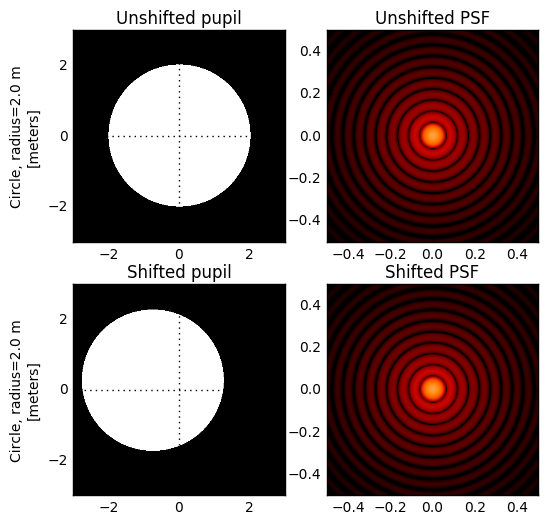

In [11]:
plt.figure(figsize=(6,6))

ap_regular = poppy.CircularAperture(radius=2, pad_factor=1.5)  # pad_factor is important here - without it you will
ap_shifted = poppy.CircularAperture(radius=2, pad_factor=1.5)  # crop off part of the circle outside the array.
ap_shifted.shift_x =-0.75
ap_shifted.shift_y = 0.25

plt.figure(figsize=(6,6))

for optic, title, i in [(ap_regular, 'Unshifted', 1), (ap_shifted, 'Shifted', 3)]:

    sys = poppy.OpticalSystem()
    sys.addPupil(optic)
    sys.addDetector(0.010, fov_pixels=100)
    psf = sys.calcPSF()

    ax1 = plt.subplot(2,2,i)
    optic.display(nrows=2, colorbar=False, ax=ax1)
    ax1.set_title(title+' pupil')
    ax2 = plt.subplot(2,2,i+1)
    poppy.display_PSF(psf,ax=ax2, colorbar=False)
    ax2.set_title(title+' PSF')
    
plt.savefig('example_shift_invariance.png', dpi=100)


In addition to setting the attributes as shown in the above example, these
options can be set directly in the initialization of such elements::



DEBUG:poppy:Displaying Rectangle, size= 0.5 m wide * 1.0 m high
INFO:poppy:Computing amplitude for Rectangle, size= 0.5 m wide * 1.0 m high sampled onto 512 pixel grid
INFO:poppy:Computing opd for Rectangle, size= 0.5 m wide * 1.0 m high sampled onto 512 pixel grid
DEBUG:poppy:Display pixel scale = 0.0021836601342771385 m / pix 


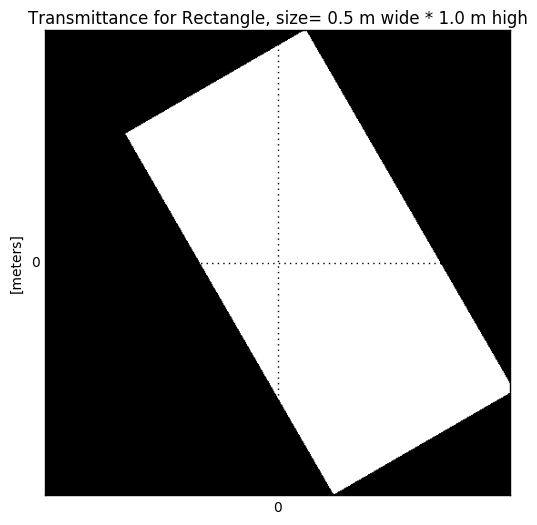

In [12]:
plt.figure(figsize=(6,6))

ap = poppy.RectangleAperture(rotation=30, shift_x=0.1)
ap.display(colorbar=False)
plt.savefig('example_shift_and_rotate.png', dpi=100)